Nesse relatório parcial vamos utilizar a biblioteca OpenCV (cv2) para fazer as transformações de cor e equalizações por histograma. No relatório final vamos tentar implementar nossa própria função para a equalização por histograma adaptativa com limite de contraste.

In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import cv2

Obtivemos as imagens de input de fotos de celular retiradas pelos próprios integrantes na USP-São Carlos. Faremos a discussão de uma dessas imagens *bandeco1.jpg*. A análise pode ser feita transformando a foto em preto e branco ou mudando o tipo de formato de cor para LAB e realizando os procedimentos apenas no canal de luminosidade, preservando os 2 canais de cores.

Vamos iniciar utilizando uma versão preto e branco da imagem

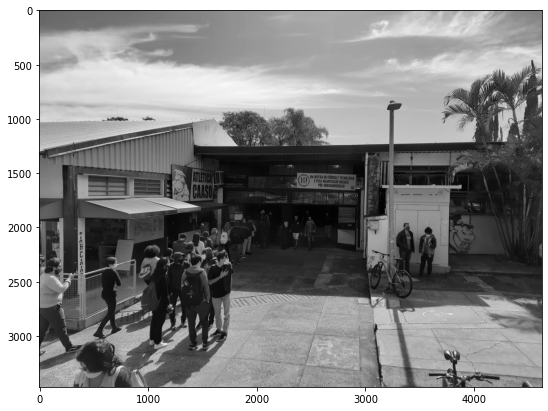

In [4]:
image = cv2.imread("imagens/bandeco1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(9,12))
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)


Pelo que pudemos observar o próprio celular já faz algum tipo de ajuste de iluminação e, mesmo nessa situação de muita luminosidade (hora do almoço), o histograma da imagem não fica deslocado para direita.

(0.0, 256.0)

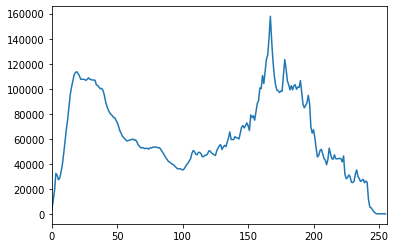

In [5]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0, 256])

Por isso, ao fazer a equalização por histograma normal (global) nota-se pouco ganho de detalhes nas áreas mais escuras

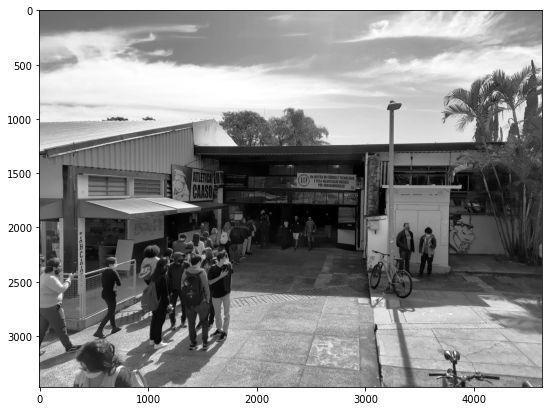

In [6]:
HistGlobal = cv2.equalizeHist(gray)
plt.figure(figsize=(9,12))
plt.imshow(HistGlobal, cmap='gray', vmin=0, vmax=255)


Ao utilizar a técnica de equalização por histograma adaptativa, espera-se obter mais detalhes da entrada do bandejão sem perder os detalhes da área mais clara.

Vamos utlizar a função CLAHE (contrast limited adaptative histogram equalization), mas sem o limite de contraste (colocamos um valor muito alto para clipLimit)

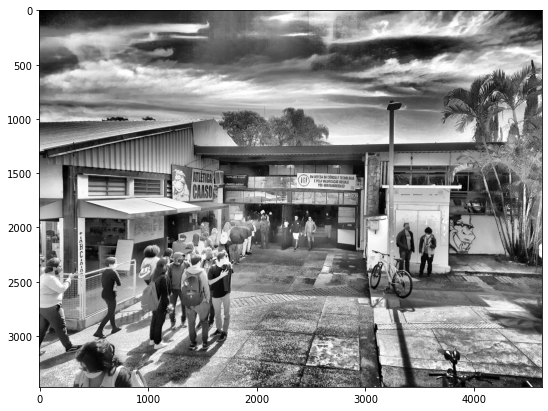

In [8]:
clahe = cv2.createCLAHE(clipLimit = 1000)
AdapHistEqual = clahe.apply(gray)
plt.figure(figsize=(9,12))
plt.imshow(AdapHistEqual, cmap='gray', vmin=0, vmax=255)

As áreas escuras ficaram mais visíveis, mas foram criados muitos artefatos. Apareceram borrões de iluminação nos alunos e no céu. E as texturas ficaram muito alteradas, como no piso da entrada que parece estar todo manchado e no céu que parece estar tempestuoso e a imagem foi tirada em uma tarde de sol.

Para minimizar os artefatos e esses efeitos deletérios vamos utilizar um limite de contraste (ex: clipLimit = 2)

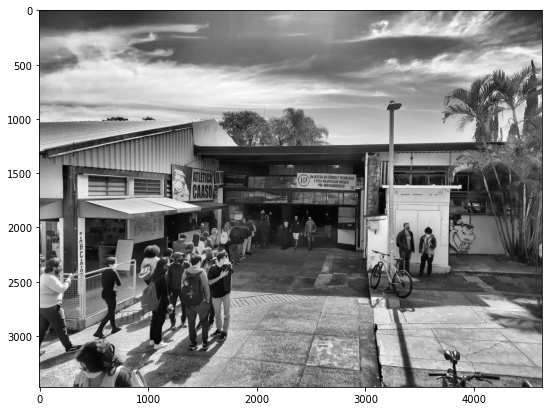

In [9]:
clahe = cv2.createCLAHE(clipLimit = 2)
CLAHE = clahe.apply(gray)
plt.figure(figsize=(9,12))
plt.imshow(CLAHE, cmap='gray', vmin=0, vmax=255)

Agora podemos ter um pouco mais de contraste na região escura mas sem os artefatos que o adaptative histogram equalization cria.

Ainda podemos observar o aumento de contraste nas áreas mais claras como o céu e o chão. Se isso é útil ou não depende da intenção de quem tirou a foto. Se o objetivo é mostrar os alunos na fila, talvez aumentar o contraste das regiões mais claras não seja interessante.

Esse mesmo processo também pode ser feito com a imagem colorida. Mudamos o formato das cores para o LAB e fazemos o mesmo processo mas apenas com o canal de luminosidade.

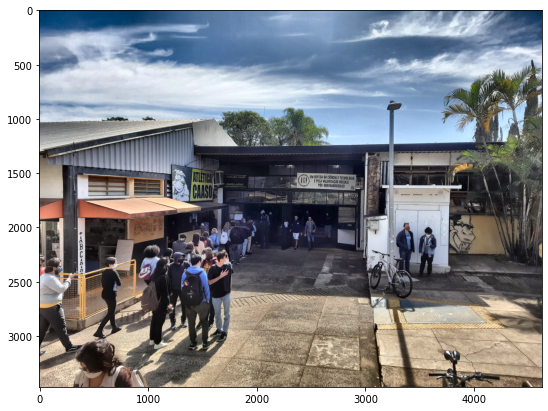

In [10]:
# Transformando o espaco de cor de BGR para LAB
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

lab_planes = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=2)

# Aplicamos o clahe apenas no canal de Luminosidade
lab_planes[0] = clahe.apply(lab_planes[0])

lab = cv2.merge(lab_planes)

# Transormando o espaço de cor para RGB para plotagem
rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

plt.figure(figsize=(9,12))

plt.imshow(rgb)